In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import sqlite3 as sq

# Archive #4

#### Procedure for reading the data

We used SQLite to process the file.

In [2]:
conn = sq.connect('yeast.sqlite')

#### Procedure for cleaning data

Similar to Archive #2, we decided to look at a few major tables and clean them by joining them on IDs from other tables. Primary keys weren't marked as clearly across the database, nor were foreign keys, but by inspecting the data lake, this is what we manually came up with:

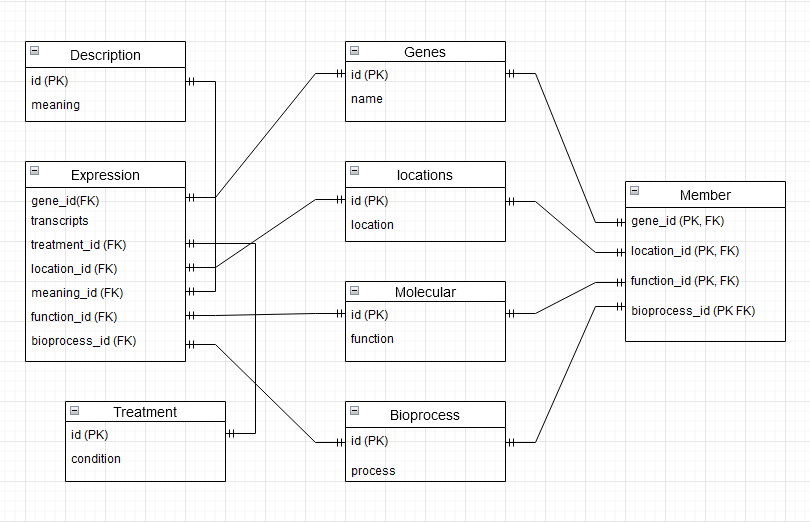

#### Merging Tables in our Data Lake to transition to Data Warehouse

First, for Member...

In [103]:
tables_import = ['Member', 'Genes', 'locations', 'Molecular', 'Bioprocess']
for table in tables_import:
    exec(f'{table} = pd.read_sql_query(f"SELECT * from {table}", sq.connect("yeast.sqlite"))')

Member

,gene_id,location_id,function_id,bioprocess_id
0,1,1,1,1
1,2,2,2,2
2,3,3,3,3
3,4,3,4,4
4,5,3,5,5
...,...,...,...,...
1459,1460,1,1,1
1460,1461,3,1,10
1461,1462,1,14,9
1462,1463,1,2,9


In [138]:
Memberdf = pd.merge(Member, Genes, how="left", left_on="gene_id", right_on="id")
Memberdf = pd.merge(Memberdf, locations, how="left", left_on="location_id", right_on="id")
Memberdf = pd.merge(Memberdf, Molecular, how="left", left_on="function_id", right_on="id")
Memberdf = Memberdf.drop(columns=["gene_id", "location_id", "id_x", "id_y", "function_id", "id"])
Memberdf = pd.merge(Memberdf, Bioprocess, how="left", left_on="bioprocess_id", right_on="id")
Memberdf = Memberdf.drop(columns=["bioprocess_id", "id"])
Memberdf['process'] = Memberdf['process'].str.strip()

In [141]:
Memberdf.head(10)

,name,location,function,process
0,YGR131W,membrane,molecular_function,protein ion
1,YNL003C,mitochond,transmembrane,transport ion
2,YBR160W,nucle,RNA polymerase,negative regulation ion repair
3,YOL034W,nucle,damage,repair ion
4,YBL008W,nucle,transcription,negative regulation ion
5,YIL004C,membrane,receptor,transport ion
6,YJR140C,nucle,transcription,ion positive regulation histone
7,YOR033C,nucle,exonuclease activity,repair ion
8,YBR043C,membrane,transmembrane,transport
9,YLR011W,nucle,dehydrogenase,ion


Then, for Expression:

In [111]:
tables_import = ['Expression', 'Genes', 'locations', 'Molecular', 'Bioprocess', 'Treatment', 'Description']
for table in tables_import:
    exec(f'{table} = pd.read_sql_query(f"SELECT * from {table}", sq.connect("yeast.sqlite"))')

In [112]:
Expressiondf = pd.merge(Expression, Genes, how="left", left_on="gene_id", right_on="id")
Expressiondf = pd.merge(Expressiondf, Treatment, how="left", left_on="treatment_id", right_on="id")
Expressiondf = pd.merge(Expressiondf, locations, how="left", left_on="location_id", right_on="id")
Expressiondf = Expressiondf.drop(columns=['id','id_x','id_y'])

Expressiondf = pd.merge(Expressiondf, Description, how="left", left_on="meaning_id", right_on="id")
Expressiondf = pd.merge(Expressiondf, Molecular, how="left", left_on="function_id", right_on="id")
Expressiondf = pd.merge(Expressiondf, Bioprocess, how="left", left_on="bioprocess_id", right_on="id")

In [113]:
Expressiondf.head(10)

,gene_id,transcripts,treatment_id,location_id,meaning_id,function_id,bioprocess_id,name,condition,location,id_x,meaning,id_y,function,id,process
0,1,7.379174,40,1,40,1,1,YGR131W,IFFABF,membrane,40,E1B1 ethanol,1,molecular_function,1,protein ion
1,1,5.858715,68,1,68,1,1,YGR131W,SAASCC,membrane,68,pbs2 galactose,1,molecular_function,1,protein ion
2,1,12.130323,50,1,50,1,1,YGR131W,IFFAFF,membrane,50,G2A1 glucose,1,molecular_function,1,protein ion
3,1,12.679748,46,1,46,1,1,YGR131W,IFFAFA,membrane,46,G1A1 glucose,1,molecular_function,1,protein ion
4,1,11.276427,55,1,54,1,1,YGR131W,INICIA,membrane,54,YB210 biofuel generation,1,molecular_function,1,protein ion
5,1,18.484635,59,1,57,1,1,YGR131W,INICIF,membrane,57,YB211 biofuel generation,1,molecular_function,1,protein ion
6,1,2.377259,86,1,84,1,1,YGR131W,SAABQI,membrane,84,30 deg temperature,1,molecular_function,1,protein ion
7,1,22.251591,17,1,15,1,1,YGR131W,FFNAAA,membrane,15,Strain6 phenol lysis,1,molecular_function,1,protein ion
8,1,4.405163,35,1,35,1,1,YGR131W,IFAAAR,membrane,35,DDY3630 strain W303,1,molecular_function,1,protein ion
9,1,0.467589,3,1,3,1,1,YGR131W,AFIINC,membrane,3,itc1 itc1-1_dUTP,1,molecular_function,1,protein ion


In [114]:
Expressiondf = Expressiondf[['gene_id',
                             'name',
                             'transcripts',
                             'condition',
                             'location',
                             'meaning',
                             'function',
                             'process'
                             ]]
Expressiondf = Expressiondf.rename(columns={'gene_id': 'Gene ID',
                                            'name': 'Name',
                                            'transcripts': 'Transcript',
                                            'condition': 'Condition',
                                            'location': 'Location',
                                            'meaning': 'Description',
                                            'function': 'Function',
                                            'process': 'Bioprocess'})

In [166]:
Expressiondf.head(15)

,Gene ID,Name,Transcript,Condition,Location,Description,Function,Bioprocess
0,1,YGR131W,7.379174,IFFABF,membrane,E1B1 ethanol,molecular_function,protein ion
1,1,YGR131W,5.858715,SAASCC,membrane,pbs2 galactose,molecular_function,protein ion
2,1,YGR131W,12.130323,IFFAFF,membrane,G2A1 glucose,molecular_function,protein ion
3,1,YGR131W,12.679748,IFFAFA,membrane,G1A1 glucose,molecular_function,protein ion
4,1,YGR131W,11.276427,INICIA,membrane,YB210 biofuel generation,molecular_function,protein ion
5,1,YGR131W,18.484635,INICIF,membrane,YB211 biofuel generation,molecular_function,protein ion
6,1,YGR131W,2.377259,SAABQI,membrane,30 deg temperature,molecular_function,protein ion
7,1,YGR131W,22.251591,FFNAAA,membrane,Strain6 phenol lysis,molecular_function,protein ion
8,1,YGR131W,4.405163,IFAAAR,membrane,DDY3630 strain W303,molecular_function,protein ion
9,1,YGR131W,0.467589,AFIINC,membrane,itc1 itc1-1_dUTP,molecular_function,protein ion


# Queries

In [155]:
Memberdf["process"].unique()

array(['protein ion', 'transport ion', 'negative regulation ion repair',
       'repair ion', 'negative regulation ion',
       'ion positive regulation histone', 'transport', 'ion',
       'ion membrane organization', 'transport ion regulation positive',
       'ion positive regulation', 'biological_process', 'ion regulation',
       'protein catabolic process', 'positive regulation ion protein',
       'catabolic process', 'ion protein targeting', 'ion protein',
       'ion protein negative regulation', 'protein',
       'transport positive regulation ion', 'metabolic process',
       'transport protein ion', 'protein targeting transport',
       'regulation protein ion negative', 'regulation ion histone',
       'catabolic process ion', 'protein targeting transport ion',
       'regulation ion positive negative', 'ion transport protein',
       'catabolic process positive regulation ion', 'protein ion repair',
       'protein targeting ion', 'ion regulation positive negative',
     

In [144]:
member_query_one = Memberdf.loc[(Memberdf["process"] == "ion") & (Memberdf["location"] == "nucle")]
member_query_one

,name,location,function,process
9,YLR011W,nucle,dehydrogenase,ion
12,YGL171W,nucle,ATP,ion
29,YGR145W,nucle,molecular_function,ion
34,YER168C,nucle,tRNA,ion
36,YEL026W,nucle,snRNA binding,ion
...,...,...,...,...
1438,YFL013C,nucle,molecular_function,ion
1440,YAL025C,nucle,molecular_function,ion
1445,YOL017W,nucle,molecular_function,ion
1455,YOR287C,nucle,molecular_function,ion


##### How many entries of data in Expression with Condition = 'IFFAFA' and Description = 'G1A1 glucose'?

In [156]:
Expressiondf["Condition"].unique()

array(['IFFABF', 'SAASCC', 'IFFAFF', 'IFFAFA', 'INICIA', 'INICIF',
       'SAABQI', 'FFNAAA', 'IFAAAR', 'AFIINC', 'IFFABN', 'SAARRS',
       'FFNARN', 'SAABQR', 'FFNAAR', 'FAFASB', 'SAABBN', 'SAASCF',
       'INICIQ', 'SAABFA', 'IFFAFQ', 'SAABRQ', 'IFFAFB'], dtype=object)

In [174]:
Expressiondf.loc[(Expressiondf['Condition'] == 'IFFAFA') & (Expressiondf['Description'] == 'G1A1 glucose')].count()

Gene ID        1464
Name           1464
Transcript     1464
Condition      1464
Location       1464
Description    1464
Function       1464
Bioprocess     1464
dtype: int64

##### Average Transcript varying from Location

In [187]:
lt = Expressiondf.groupby("Location")['Transcript'].agg('mean')

In [189]:
lt_df = lt.to_frame()
lt_df

,Transcript
Location,
cytoplasm,252.816613
cytosol,175.914162
endoplasm,90.896088
extracellular,757.606906
membrane,102.296528
mitochond,157.095959
nucle,50.936951


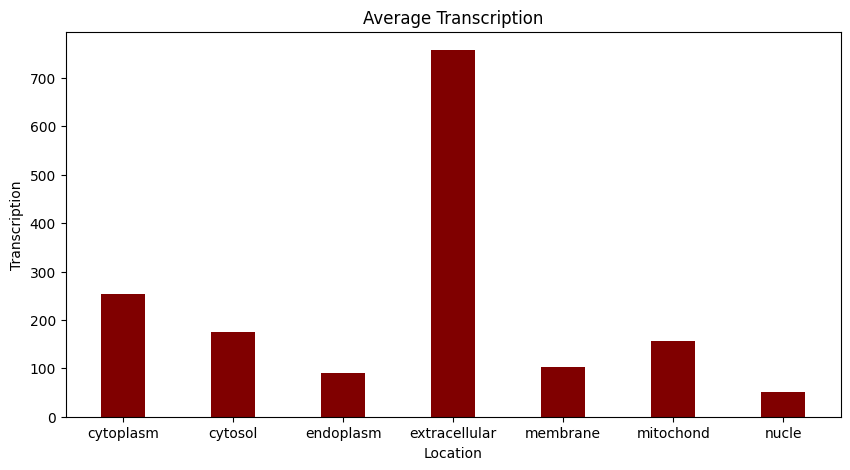

In [193]:
fig = plt.figure(figsize = (10, 5))
plt.bar(lt_df.index, lt_df.Transcript, color ='maroon', width = 0.4)
plt.xlabel("Location")
plt.ylabel("Transcription")
plt.title("Average Transcription")
plt.show()